<a href="https://colab.research.google.com/github/yangyuwang/gendered_painting/blob/main/wangyd_face_detection_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Detection on Artworks from WikiArt.org

Author: Yangyu Wang

Date: Mar 4. 2025

## Data Preprocessing

In this part, I will extract data from my own database, and link them together by a ArtworkDataset Class.

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yangyuwang","key":"eab42cdb2058cfebb29d25e28cac9744"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import pandas as pd

file_id = '1Wa_MueOpfdXZveRS5J-eMLyaBQ-SeFtN'
uuid = '6139ffcf-19c1-46b4-b013-a33b11655f4d'
at = 'AIrpjvPTjK6nk2lXSIJKc8rBEEqH:1739041451599'

download_url = f'https://drive.usercontent.google.com/download?id={file_id}&export=download&authuser=0&confirm=t&uuid={uuid}&at={at}'

df = pd.read_csv(download_url)

df.head()

<ipython-input-5-67d5d9e385a8>:9: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(download_url)


,Artist_name,Artwork.Name,Year,Link,url,Create.Date,Create.Location,Date,image_url,Style,...,Wikipedia,Painting.School,Official.site,Friends.and.Co.workers,Family.and.Relatives,Pupils,Teachers,Art.institution,Artwork_ID,Style_Category
0,3d,No Great Crime,1983,https://www.wikiart.org/en/3d/no-great-crime-1983,https://www.wikiart.org/en/3d/no-great-crime-1983,1983.0,NaN,1983,https://uploads2.wikiart.org/images/3d/no-grea...,Street art,...,https://en.wikipedia.org/wiki/Robert_Del_Naja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Street & Urban Art
1,3d,3D,1984,https://www.wikiart.org/en/3d/3d-1984,https://www.wikiart.org/en/3d/3d-1984,1984.0,NaN,1984,https://uploads7.wikiart.org/images/3d/3d-1984...,Street art,...,https://en.wikipedia.org/wiki/Robert_Del_Naja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Street & Urban Art
2,3d,Wild Bunch,1984,https://www.wikiart.org/en/3d/wild-bunch-1984,https://www.wikiart.org/en/3d/wild-bunch-1984,1984.0,NaN,1984,https://uploads6.wikiart.org/images/3d/wild-bu...,Street art,...,https://en.wikipedia.org/wiki/Robert_Del_Naja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Street & Urban Art
3,3d,Serious Art,1986,https://www.wikiart.org/en/3d/serious-art-1986,https://www.wikiart.org/en/3d/serious-art-1986,1986.0,NaN,1986,https://uploads8.wikiart.org/images/3d/serious...,Street art,...,https://en.wikipedia.org/wiki/Robert_Del_Naja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,Street & Urban Art
4,3d,"Robert De Niro, Taxi Driver",1988,https://www.wikiart.org/en/3d/robert-de-niro-t...,https://www.wikiart.org/en/3d/robert-de-niro-t...,1988.0,NaN,1988,https://uploads5.wikiart.org/images/3d/robert-...,Street art,...,https://en.wikipedia.org/wiki/Robert_Del_Naja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Street & Urban Art


In [ ]:
!curl -L -o /content/wikiart-images.zip\
  https://www.kaggle.com/api/v1/datasets/download/yangyuwang/wikiart-images

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 29.6G  100 29.6G    0     0  21.4M      0  0:23:34  0:23:34 --:--:-- 21.2M


In [ ]:
! unzip /content/wikiart-images.zip -d /content/artworks/

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: /content/artworks/artwork_picture/00193/00193623.jpg  
  inflating: /content/artworks/artwork_picture/00193/00193623.json  
  inflating: /content/artworks/artwork_picture/00193/00193623.txt  
  inflating: /content/artworks/artwork_picture/00193/00193624.jpg  
  inflating: /content/artworks/artwork_picture/00193/00193624.json  
  inflating: /content/artworks/artwork_picture/00193/00193624.txt  
  inflating: /content/artworks/artwork_picture/00193/00193625.jpg  
  inflating: /content/artworks/artwork_picture/00193/00193625.json  
  inflating: /content/artworks/artwork_picture/00193/00193625.txt  
  inflating: /content/artworks/artwork_picture/00193/00193626.jpg  
  inflating: /content/artworks/artwork_picture/00193/00193626.json  
  inflating: /content/artworks/artwork_picture/00193/00193626.txt  
  inflating: /content/artworks/artwork_picture/00193/00193627.jpg  
  inflating: /content/artworks/artwork_picture/00193/00193627.json  
  inflating: /co

In [ ]:
!rm /content/wikiart-images.zip

In [ ]:
import os
import json
from PIL import Image
from tqdm import tqdm
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt

In [ ]:
ARTWORK_DIR = '/content/artworks/artwork_picture'
artwork_df = df.dropna(subset=['image_n', 'Artwork_ID'])
artwork_df['year'] = pd.to_numeric(artwork_df['Year'], errors='coerce')

MIN_SAMPLES = 100  # threshold
style_counts = artwork_df['Style_Category'].value_counts()
#valid_styles = style_counts[style_counts >= MIN_SAMPLES].index.tolist()
#artwork_df = artwork_df[artwork_df['Style_Category'].isin(valid_styles)].reset_index(drop=True)

artwork_df.shape

(151776, 41)

In [ ]:
class ArtworkDataset(Dataset):
    """
    A PyTorch Dataset for loading artwork images from the local directory.
    The image file name is constructed from the 'image_n' column (zero-padded to 8 digits).
    """
    def __init__(self, dataframe, image_dir, transform=None):
        """
        Args:
            dataframe (pd.DataFrame): DataFrame containing artwork metadata.
            image_dir (str): Directory where the image (and JSON) files are stored.
            transform (callable, optional): Transform to be applied on a PIL image.
        """
        self.data = dataframe
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        image_n = row['image_n']
        try:
            image_filename = f"{int(image_n):08d}.jpg"
        except:
            image_filename = f"{str(image_n).zfill(8)}.jpg"

        subdirectory = f"{int(image_n) // 1000:05d}"
        image_path = os.path.join(self.image_dir, subdirectory, image_filename)

        # Load the image from disk.
        try:
            image = Image.open(image_path).convert('RGB')
        except Exception as e:
            image = Image.new('RGB', (64, 64), color=(0, 0, 0))  # Black blank image

        # Apply the transform
        if self.transform:
            image = self.transform(image)

        image_array = np.array(image)

        artwork_id = row['Artwork_ID']
        return image_array, image, artwork_id

In [ ]:
artist_dataset = ArtworkDataset(artwork_df, image_dir=ARTWORK_DIR)

## Face Detection

In this section, I use [MTCNN pre-trained face detection](https://github.com/ipazc/mtcnn) to detect the face number of paintings. I visualize the trend of no faces (landscapes), single faces (portraits), and multiple-face paintings. I only save the single-face portraits for the next step of gender discrimination in portraits.

In [ ]:
!pip install deepface
!pip install retina-face

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.5 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=8eedbbe18fd85118a993fb1ad1fd88123ee7a7fd4cf3fa9cb2040945ea26cfde
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


In [ ]:
!pip install keras

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
from retinaface import RetinaFace
from deepface import DeepFace

25-04-09 23:33:51 - Directory /root/.deepface has been created
25-04-09 23:33:51 - Directory /root/.deepface/weights has been created


In [ ]:
from tqdm import tqdm

In [ ]:
def detect_faces_retinaface(image_bgr):
    """
    Uses RetinaFace to detect faces and landmarks in the image.

    Args:
        image_bgr (numpy.ndarray): The image in BGR color space.

    Returns:
        detections (dict): A dictionary of detections with each face's bounding box and landmarks.
    """
    detections = RetinaFace.detect_faces(image_bgr)
    return detections

def get_gender_deepface(face_roi_bgr):
    """
    Uses DeepFace to predict the gender of the cropped face region.

    Args:
        face_roi_bgr (numpy.ndarray): Face region in BGR.

    Returns:
        gender (str): Predicted gender ("Man" or "Woman") as returned by DeepFace.
    """
    # Use DeepFace with detector_backend='skip' since we already have a cropped face.
    analysis = DeepFace.analyze(face_roi_bgr, actions=['gender'], enforce_detection=False, detector_backend='skip')
    gender = analysis[0].get('gender', 'unknown')
    return gender

def estimate_head_pose(landmarks, image_shape):
    """
    Estimates head pose (yaw, pitch, roll) from detected facial landmarks.

    Args:
        landmarks (dict): Detected landmarks with keys 'left_eye', 'right_eye', 'nose',
                          'mouth_left', and 'mouth_right'.
        image_shape (tuple): Shape of the image (height, width, channels).

    Returns:
        euler_angles (np.ndarray): Array of head pose angles in degrees (yaw, pitch, roll),
                                   or None if estimation fails.
    """
    # Define a simple 3D model for five facial landmarks.
    model_points = np.array([
        [0.0, 0.0, 0.0],         # Nose tip
        [-30.0, 30.0, -30.0],     # Left eye
        [30.0, 30.0, -30.0],      # Right eye
        [-20.0, -30.0, -30.0],    # Left mouth corner
        [20.0, -30.0, -30.0]      # Right mouth corner
    ], dtype="double")

    image_points = np.array([
        landmarks.get('nose'),
        landmarks.get('left_eye'),
        landmarks.get('right_eye'),
        landmarks.get('mouth_left'),
        landmarks.get('mouth_right')
    ], dtype="double")

    height, width = image_shape[:2]
    focal_length = width  # approximate focal length
    center = (width / 2, height / 2)
    camera_matrix = np.array(
        [[focal_length, 0, center[0]],
         [0, focal_length, center[1]],
         [0, 0, 1]],
        dtype="double"
    )
    dist_coeffs = np.zeros((4,1))

    success, rotation_vector, translation_vector = cv2.solvePnP(
        model_points, image_points, camera_matrix, dist_coeffs, flags=cv2.SOLVEPNP_EPNP
    )
    if not success:
        return None

    rotation_matrix, _ = cv2.Rodrigues(rotation_vector)
    proj_matrix = np.hstack((rotation_matrix, translation_vector))
    _, _, _, _, _, _, euler_angles = cv2.decomposeProjectionMatrix(proj_matrix)
    return euler_angles.flatten()

def compute_face_size(landmarks, image_shape):
    """
    Computes the size of the face based on the landmarks relative to the overall image size.
    The size is computed as the area of the bounding box encompassing the landmarks, normalized
    by the area of the image.

    Args:
        landmarks (dict): Detected landmarks (should include keys: 'nose', 'left_eye', 'right_eye', 'mouth_left', 'mouth_right').
        image_shape (tuple): Shape of the image (height, width, channels).

    Returns:
        size_ratio (float): The ratio of the face bounding box area to the image area.
    """
    # Ensure required landmarks exist.
    req_keys = ['nose', 'left_eye', 'right_eye', 'mouth_left', 'mouth_right']
    if not all(k in landmarks for k in req_keys):
        return None

    points = np.array([landmarks[k] for k in req_keys])
    # Compute the minimal bounding box coordinates around the landmarks.
    min_xy = points.min(axis=0)
    max_xy = points.max(axis=0)
    face_width = max_xy[0] - min_xy[0]
    face_height = max_xy[1] - min_xy[1]
    face_area = face_width * face_height

    image_area = image_shape[0] * image_shape[1]
    size_ratio = face_area / image_area if image_area > 0 else None
    return size_ratio

def process_image(pil_image):
    """
    Processes a PIL image to detect faces, predict gender, estimate head pose,
    and compute the relative face size.

    Args:
        pil_image (PIL.Image): Input image.

    Returns:
        results (list): A list of dictionaries for each detected face containing:
            - 'size': Face size ratio (face bounding box area from landmarks / image area)
            - 'gender': Predicted gender (string)
            - 'head_pose': Estimated head pose angles (yaw, pitch, roll) if available.
    """
    # Convert PIL image to OpenCV BGR image.
    image_rgb = np.array(pil_image)
    image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

    # Detect faces and landmarks.
    detections = detect_faces_retinaface(image_bgr)
    results = []
    if not isinstance(detections, dict):
        return results

    for face_id, face_data in detections.items():
        bbox = face_data.get("facial_area")
        landmarks = face_data.get("landmarks", {})

        # Crop face ROI for gender prediction.
        x1, y1, x2, y2 = bbox
        h_img, w_img = image_bgr.shape[:2]
        x1, y1 = max(0, x1), max(0, y1)
        x2, y2 = min(w_img, x2), min(h_img, y2)
        face_roi = image_bgr[y1:y2, x1:x2]

        gender = get_gender_deepface(face_roi)
        head_pose = None
        if landmarks and all(k in landmarks for k in ['nose', 'left_eye', 'right_eye', 'mouth_left', 'mouth_right']):
            head_pose = estimate_head_pose(landmarks, image_bgr.shape)
            face_size = compute_face_size(landmarks, image_bgr.shape)
        else:
            face_size = None

        results.append({
            "size": face_size,
            "gender": gender,
            "head_pose": head_pose,
            "bbox": bbox,
            "landmarks": landmarks
        })

    return results

In [ ]:
def annotate_image_with_results(pil_image, face_results):
    """
    Annotates the input PIL image with face detections using the provided results.
    This version draws annotations on separate lines and marks key facial landmarks (eyes, nose, mouth).

    Args:
        pil_image (PIL.Image): The original image.
        face_results (list): A list of dictionaries for each detected face.
            Each dictionary should include:
              - "bbox": [x1, y1, x2, y2]
              - "gender": dict, e.g. {"Woman": <prob>, "Man": <prob>}
              - "head_pose": np.array with three numbers (yaw, pitch, roll)
              - "landmarks": dict with keys 'left_eye', 'right_eye', 'nose', 'mouth_left', 'mouth_right'

    Returns:
        PIL.Image: The annotated image.
    """
    # Convert PIL image to OpenCV BGR image.
    image_np = np.array(pil_image)
    image_bgr = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

    for face in face_results:
        # Process the bounding box.
        bbox = face.get('bbox', None)
        if bbox is None or len(bbox) != 4:
            continue
        x1, y1, x2, y2 = [int(val) for val in bbox]

        # Draw the bounding box.
        cv2.rectangle(image_bgr, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Process and annotate gender.
        gender_info = face.get('gender', {})
        if isinstance(gender_info, dict) and gender_info:
            pred_gender = max(gender_info, key=gender_info.get)
            gender_prob = gender_info[pred_gender]
            gender_text = f"{pred_gender}: {gender_prob:.1f}%"
        else:
            gender_text = "Gender: unknown"

        # Process and annotate head pose.
        head_pose = face.get('head_pose', None)
        if head_pose is not None:
            angles = [f"{angle:.1f}" for angle in head_pose]
            head_pose_text = "HP: " + ", ".join(angles)
        else:
            head_pose_text = "HP: N/A"

        # Annotate text in two separate lines above the bounding box.
        text_x = x1
        text_y = y1 - 15  # first line above the box
        cv2.putText(image_bgr, gender_text, (text_x, text_y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        cv2.putText(image_bgr, head_pose_text, (text_x, text_y - 20),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Mark the facial landmarks if provided.
        landmarks = face.get('landmarks', {})
        if landmarks:
            # Define a circle radius and color for the landmarks.
            radius = 3
            color = (0, 0, 255)  # Red color for the landmarks.
            thickness = -1     # Filled circle.

            # For each expected landmark, draw a circle.
            for landmark_name in ['left_eye', 'right_eye', 'nose', 'mouth_left', 'mouth_right']:
                point = landmarks.get(landmark_name, None)
                if point is not None and len(point) >= 2:
                    pt = (int(round(point[0])), int(round(point[1])))
                    cv2.circle(image_bgr, pt, radius, color, thickness)

    # Convert the annotated image back to RGB and then to a PIL image.
    annotated_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    annotated_pil = Image.fromarray(annotated_rgb)
    return annotated_pil

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#all_face_results = {}
import joblib
all_face_results = joblib.load('/content/drive/MyDrive/artist_data/face_results.joblib')

In [ ]:
len(all_face_results)

65490

In [ ]:
n = 0

for i in tqdm(range(len(artist_dataset))):
    image_array, pil_image, artwork_id = artist_dataset[i]
    if artwork_id not in all_face_results.keys():
        # Process image to get face info.
        face_results = process_image(pil_image)
        # Save only size, gender, and head_pose in the dictionary by artwork_id.
        all_face_results[artwork_id] = face_results
    else:
        face_results = all_face_results.get(artwork_id)

    if face_results:
        if n % 50 == 0:
            annotated = annotate_image_with_results(pil_image, face_results)
            plt.figure(figsize=(8, 6))
            plt.imshow(annotated)
            plt.title(f"Artwork ID: {artwork_id}")
            plt.axis("off")
            plt.savefig(f"/content/drive/MyDrive/artist_data/face_results/{artwork_id}.png", dpi=100)
            plt.close()

        n += 1


100%|██████████| 151776/151776 [1:48:28<00:00, 23.32it/s]


In [ ]:
import joblib

# Save
joblib.dump(all_face_results, '/content/drive/MyDrive/artist_data/face_results.joblib')


['/content/drive/MyDrive/artist_data/face_results.joblib']

In [ ]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
import joblib

# To load:
loaded_results = joblib.load('/content/drive/MyDrive/artist_data/face_results.joblib')


In [ ]:
len(loaded_results)

139910

In [ ]:
list(loaded_results.keys())[:10]

[np.int64(122),
 np.int64(123),
 np.int64(124),
 np.int64(125),
 np.int64(128),
 np.int64(130),
 np.int64(135),
 np.int64(136),
 np.int64(138),
 np.int64(146)]

## Merge and Visualization

I merge the face numbers with larger dataset, and visualize the trend of different face number paintings.

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt


# Extract relevant data into lists
id = []
genders = []
v_p, h_p, l_p = [], [], []
sizes = []

for artwork_id, face_results in loaded_results.items():
  for face_data in face_results:
    id.append(artwork_id)
    genders.append(face_data.get('gender', 'Unknown'))
    v_p.append(abs(face_data.get('head_pose')[0]))
    h_p.append(abs(face_data.get('head_pose')[1]))
    l_p.append(abs(face_data.get('head_pose')[2]))
    sizes.append(face_data.get('size'))



In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the extracted data
gender_df = pd.DataFrame({'Woman': [gender["Woman"] for gender in genders],
                          'Man': [gender["Man"] for gender in genders]})

gender_df["gender"] = gender_df.idxmax(axis=1)

gender_df["id"] = id
gender_df["v_p"] = v_p
gender_df["h_p"] = h_p
gender_df["l_p"] = l_p
gender_df["l_p"] = 180 - gender_df["l_p"]

gender_df["sizes"] = sizes

In [ ]:
# prompt: save the gender_df in json

# Assuming gender_df is already created as in your provided code.

import json

# Save gender_df to a JSON file in your Google Drive.
gender_df.to_json('/content/drive/MyDrive/artist_data/face_results_data.json', orient='records')


# To verify, load and print the first few records:
with open('/content/drive/MyDrive/artist_data/face_results_data.json', 'r') as f:
    loaded_json = json.load(f)

print(loaded_json[:5]) # Print the first 5 entries


[{'Woman': 44.0149650574, 'Man': 55.9850349426, 'gender': 'Man', 'id': 122, 'v_p': 6.7154323024, 'h_p': 29.6881694187, 'l_p': 8.0483792571, 'sizes': 0.0007789857}, {'Woman': 96.4140014648, 'Man': 3.5860035419, 'gender': 'Woman', 'id': 122, 'v_p': 7.3011552607, 'h_p': 6.5641627851, 'l_p': 5.0257444934, 'sizes': 0.0013907821}, {'Woman': 4.7532157898, 'Man': 95.2467880249, 'gender': 'Man', 'id': 122, 'v_p': 17.7748254682, 'h_p': 64.1142738338, 'l_p': 2.4893233375, 'sizes': 0.0005472284}, {'Woman': 12.5548582077, 'Man': 87.4451370239, 'gender': 'Man', 'id': 123, 'v_p': 30.1020292413, 'h_p': 33.7036083016, 'l_p': 33.5925779538, 'sizes': 0.0015644203}, {'Woman': 93.746383667, 'Man': 6.2536201477, 'gender': 'Woman', 'id': 124, 'v_p': 7.9438595267, 'h_p': 8.2319852363, 'l_p': 4.3684703609, 'sizes': 0.0007837085}]


In [ ]:
# prompt: clustering on the gender_df's v_p, h_p, l_p, and sizes, using kmeans

import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

# Load the DataFrame from the JSON file.
gender_df = pd.read_json('/content/drive/MyDrive/artist_data/face_results_data.json', orient='records')

# Handle missing values in relevant columns. Replace with 0 for simplicity. You can explore more sophisticated imputation.
for col in ['v_p', 'h_p', 'l_p', 'sizes']:
    gender_df[col] = gender_df[col].fillna(0)

# Prepare the features for clustering.
features = gender_df[['v_p', 'h_p', 'l_p', 'sizes']].values

# Initialize KMeans with a desired number of clusters (e.g., 3).
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model to your data.
kmeans.fit(features)

# Add cluster labels to your DataFrame.
gender_df['cluster'] = kmeans.labels_

# Print the first few rows to verify the cluster labels.
print(gender_df.head())


       Woman        Man gender   id        v_p        h_p        l_p  \
0  44.014965  55.985035    Man  122   6.715432  29.688169   8.048379   
1  96.414001   3.586004  Woman  122   7.301155   6.564163   5.025744   
2   4.753216  95.246788    Man  122  17.774825  64.114274   2.489323   
3  12.554858  87.445137    Man  123  30.102029  33.703608  33.592578   
4  93.746384   6.253620  Woman  124   7.943860   8.231985   4.368470   

      sizes  cluster  
0  0.000779        0  
1  0.001391        0  
2  0.000547        1  
3  0.001564        1  
4  0.000784        0  


In [ ]:
gender_df['cluster'].value_counts()

,count
cluster,
0,100239
1,43635
2,4699


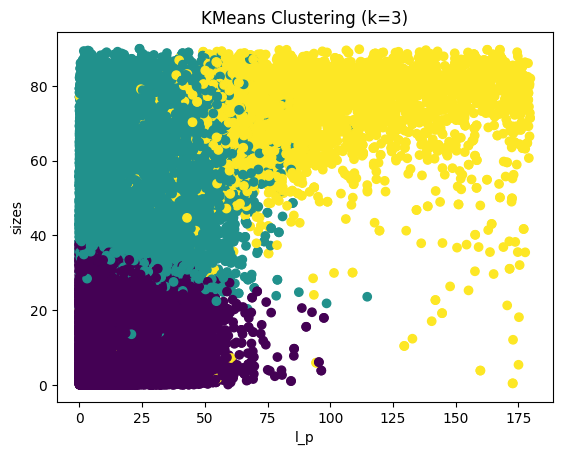

       Woman        Man gender   id        v_p        h_p        l_p  \
0  44.014965  55.985035    Man  122   6.715432  29.688169   8.048379   
1  96.414001   3.586004  Woman  122   7.301155   6.564163   5.025744   
2   4.753216  95.246788    Man  122  17.774825  64.114274   2.489323   
3  12.554858  87.445137    Man  123  30.102029  33.703608  33.592578   
4  93.746384   6.253620  Woman  124   7.943860   8.231985   4.368470   

      sizes  cluster  
0  0.000779        0  
1  0.001391        0  
2  0.000547        1  
3  0.001564        1  
4  0.000784        0  


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Based on the elbow method, choose the optimal k (number of clusters).
# Example: If the elbow is at k=3, then:
optimal_k = 3  # Replace with the actual optimal k

# Apply KMeans clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
gender_df['cluster'] = kmeans.fit_predict(features)

# Visualize the clusters (example using the first two features)
plt.scatter(gender_df['v_p'], gender_df['h_p'], c=gender_df['cluster'], cmap='viridis')
plt.title(f'KMeans Clustering (k={optimal_k})')
plt.xlabel('l_p')
plt.ylabel('sizes')
plt.show()

# Now gender_df has a new 'cluster' column indicating cluster assignments
print(gender_df.head())


                      v_p        h_p        l_p     sizes
cluster gender                                           
0       Man     10.733499  14.466307  10.190413  0.002878
        Woman   10.897066  13.695665  10.032112  0.004483
1       Man     16.808518  51.612135  20.891068  0.002240
        Woman   16.380687  51.567812  19.200616  0.003411
2       Man     86.288339  70.192793  95.872844  0.002287
        Woman   91.454658  71.431802  96.545850  0.002989


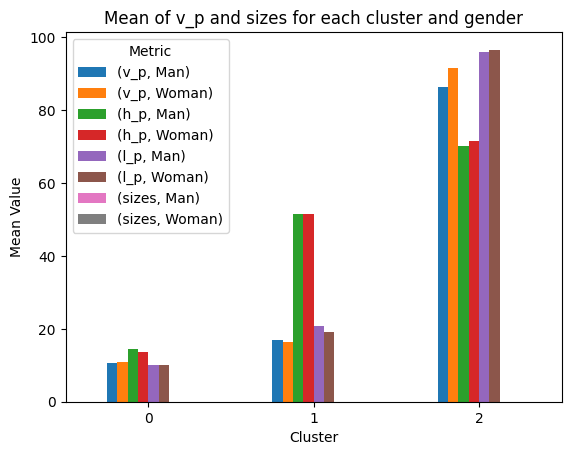

In [ ]:
# prompt: summarize the mean of _p and sizes for each cluster and each gender

import pandas as pd
import matplotlib.pyplot as plt

# Load the DataFrame from the JSON file.
# Group by cluster and gender, then calculate the mean of 'v_p' and 'sizes'.
summary = gender_df.groupby(['cluster', 'gender'])[['v_p', 'h_p', 'l_p', 'sizes']].mean()

print(summary)

# Create a bar plot of the means for visualization
summary.unstack().plot(kind='bar')
plt.title('Mean of v_p and sizes for each cluster and gender')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(title='Metric')  # Add a legend to identify 'v_p' and 'sizes'
plt.show()


In [ ]:
gender_df

,Woman,Man,gender,id,v_p,h_p,l_p,sizes
0,44.014965,55.985035,Man,122,6.715432,29.688169,8.048379,0.000779
1,96.414001,3.586004,Woman,122,7.301155,6.564163,5.025744,0.001391
2,4.753216,95.246788,Man,122,17.774825,64.114274,2.489323,0.000547
3,12.554858,87.445137,Man,123,30.102029,33.703608,33.592578,0.001564
4,93.746384,6.253620,Woman,124,7.943860,8.231985,4.368470,0.000784
...,...,...,...,...,...,...,...,...
148568,23.876703,76.123299,Man,142891,15.311579,12.345727,14.991556,0.000551
148569,8.440958,91.559044,Man,142895,20.362109,5.846517,7.047761,0.001833
148570,40.154289,59.845711,Man,142896,45.088499,70.246294,115.444656,0.000930
148571,3.013077,96.986931,Man,142896,0.166688,16.517016,33.851135,0.001097


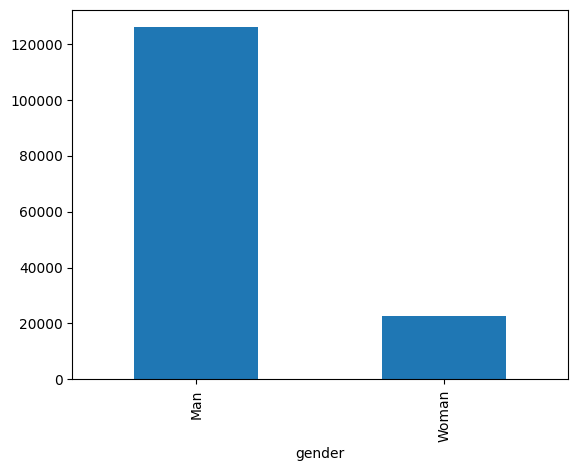

In [ ]:
gender_df["gender"].value_counts().plot(kind='bar')
plt.show()

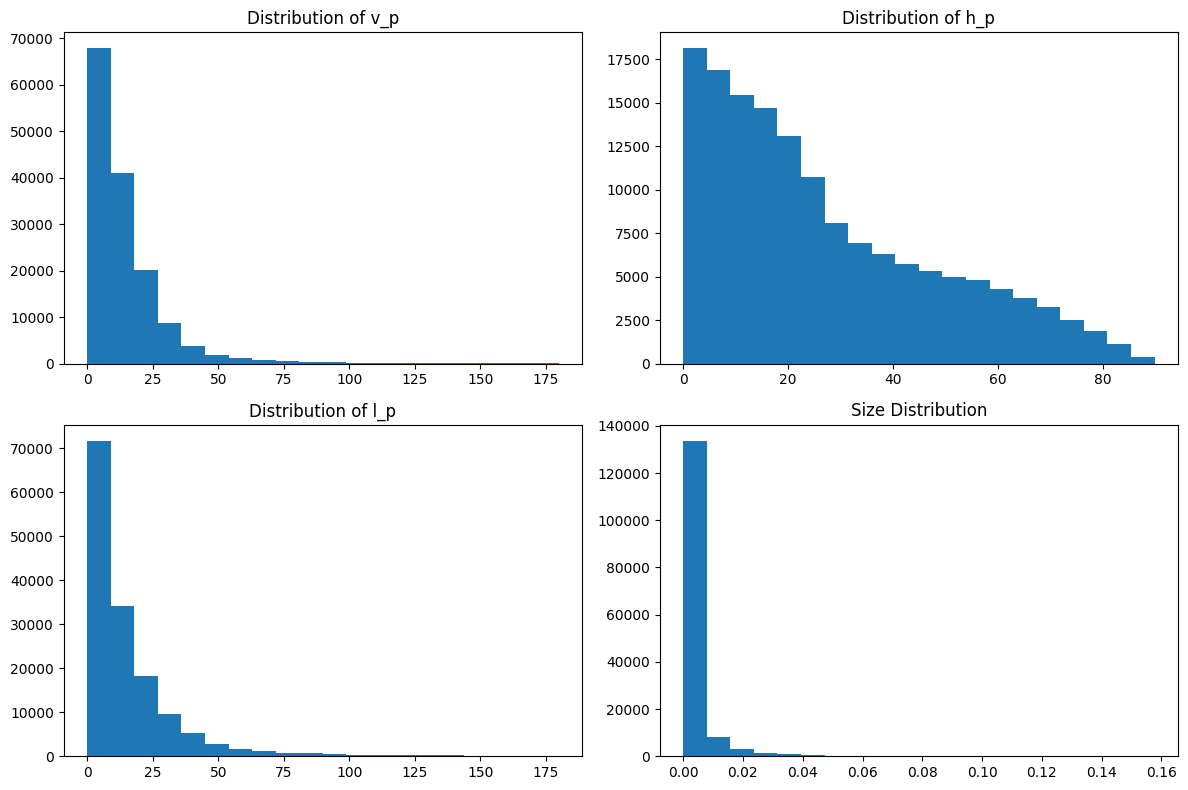

In [ ]:

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(gender_df['v_p'], bins=20)
plt.title('Distribution of v_p')

plt.subplot(2, 2, 2)
plt.hist(gender_df['h_p'], bins=20)
plt.title('Distribution of h_p')

plt.subplot(2, 2, 3)
plt.hist(gender_df['l_p'], bins=20)
plt.title('Distribution of l_p')

plt.subplot(2, 2, 4)
plt.hist(gender_df['sizes'], bins=20)
plt.title('Size Distribution')

plt.tight_layout()
plt.show()


In [ ]:
# prompt: make correlation and test the significance between gender_dummy and other things

# Convert 'gender' column to numerical (0 for Man, 1 for Woman)
gender_df['gender_dummy'] = gender_df['gender'].map({'Man': 0, 'Woman': 1})

# Test significance using t-tests
from scipy.stats import ttest_ind

for col in ['v_p', 'h_p', 'l_p', 'sizes']:
  men = gender_df[gender_df['gender_dummy'] == 0][col]
  women = gender_df[gender_df['gender_dummy'] == 1][col]
  t_statistic, p_value = ttest_ind(men, women, nan_policy='omit') #omitting NaN for correct calculations
  print(f"\nT-test for {col}:")
  print(f"  t-statistic: {t_statistic:.3f}")
  print(f"  p-value: {p_value:.3f}")
  if p_value < 0.05:
    print(f"  Significant difference between genders for {col}")
  else:
      print(f"  No significant difference between genders for {col}")



T-test for v_p:
  t-statistic: 7.134
  p-value: 0.000
  Significant difference between genders for v_p

T-test for h_p:
  t-statistic: 22.374
  p-value: 0.000
  Significant difference between genders for h_p

T-test for l_p:
  t-statistic: 13.344
  p-value: 0.000
  Significant difference between genders for l_p

T-test for sizes:
  t-statistic: -31.184
  p-value: 0.000
  Significant difference between genders for sizes


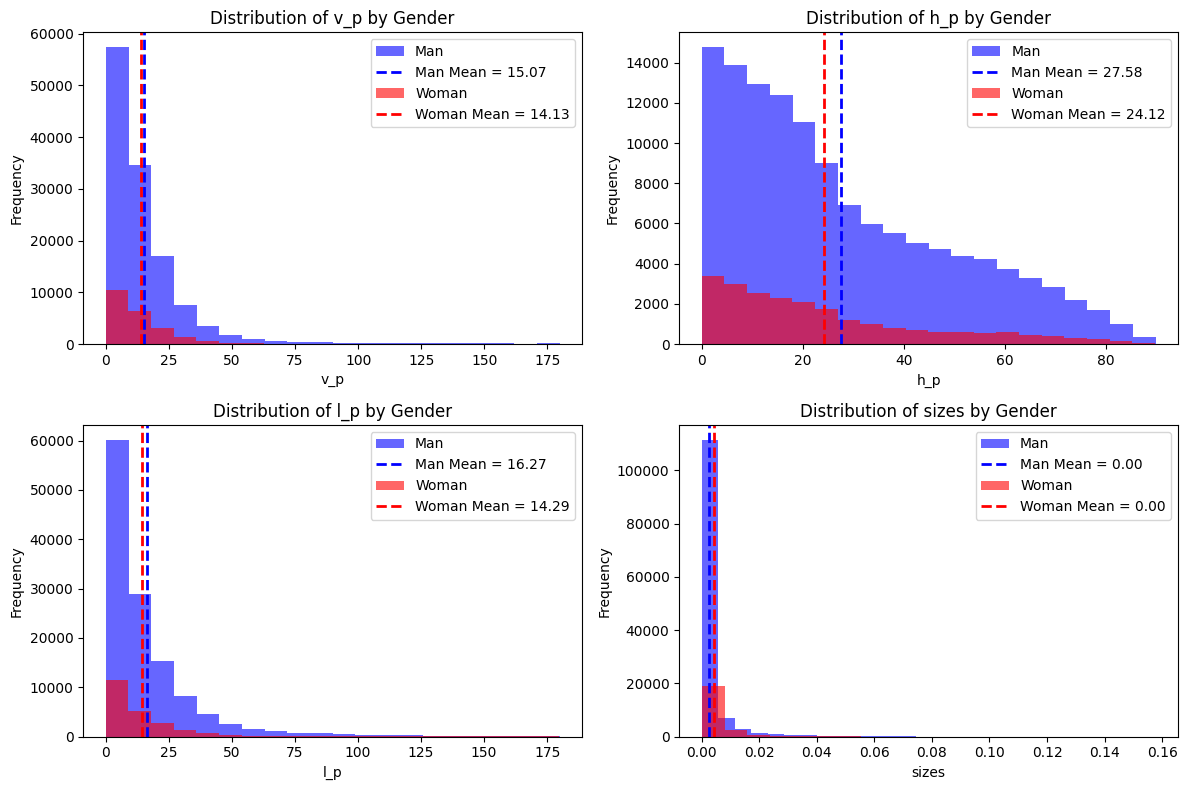

In [ ]:
# prompt: count the mean ['v_p', 'h_p', 'l_p', 'sizes'] for both gender, and plot out distribution and mean value in two genders, using different color for the mean

# Group data by gender and calculate the mean for specified columns
means = gender_df.groupby('gender')[['v_p', 'h_p', 'l_p', 'sizes']].mean()

# Plotting the distributions and means
plt.figure(figsize=(12, 8))

colors = {'Man': 'blue', 'Woman': 'red'}  # Define colors for each gender

for i, col in enumerate(['v_p', 'h_p', 'l_p', 'sizes']):
    plt.subplot(2, 2, i + 1)
    for gender, color in colors.items():
        plt.hist(gender_df[gender_df['gender'] == gender][col], bins=20, alpha=0.6, label=gender, color=color)
        mean_val = means.loc[gender, col]
        plt.axvline(x=mean_val, color=color, linestyle='dashed', linewidth=2, label=f'{gender} Mean = {mean_val:.2f}')
    plt.title(f'Distribution of {col} by Gender')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


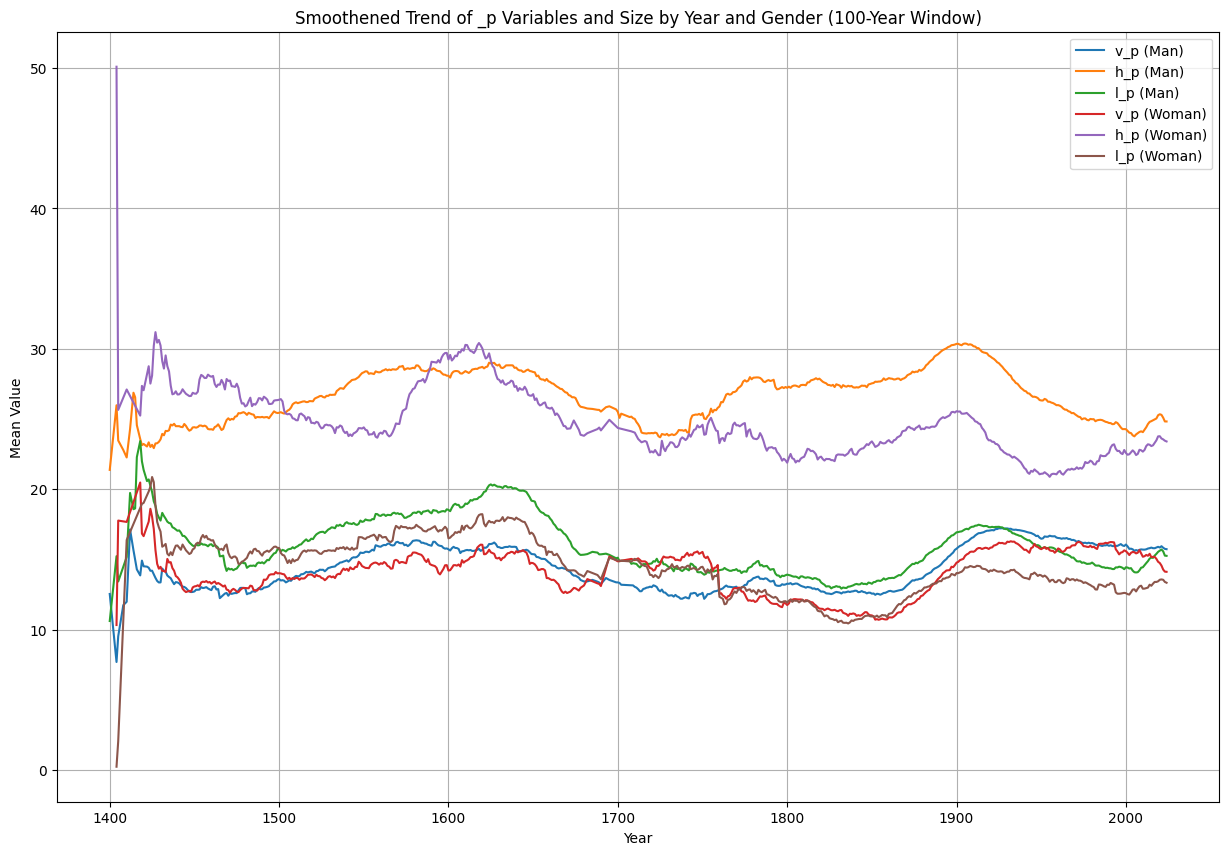

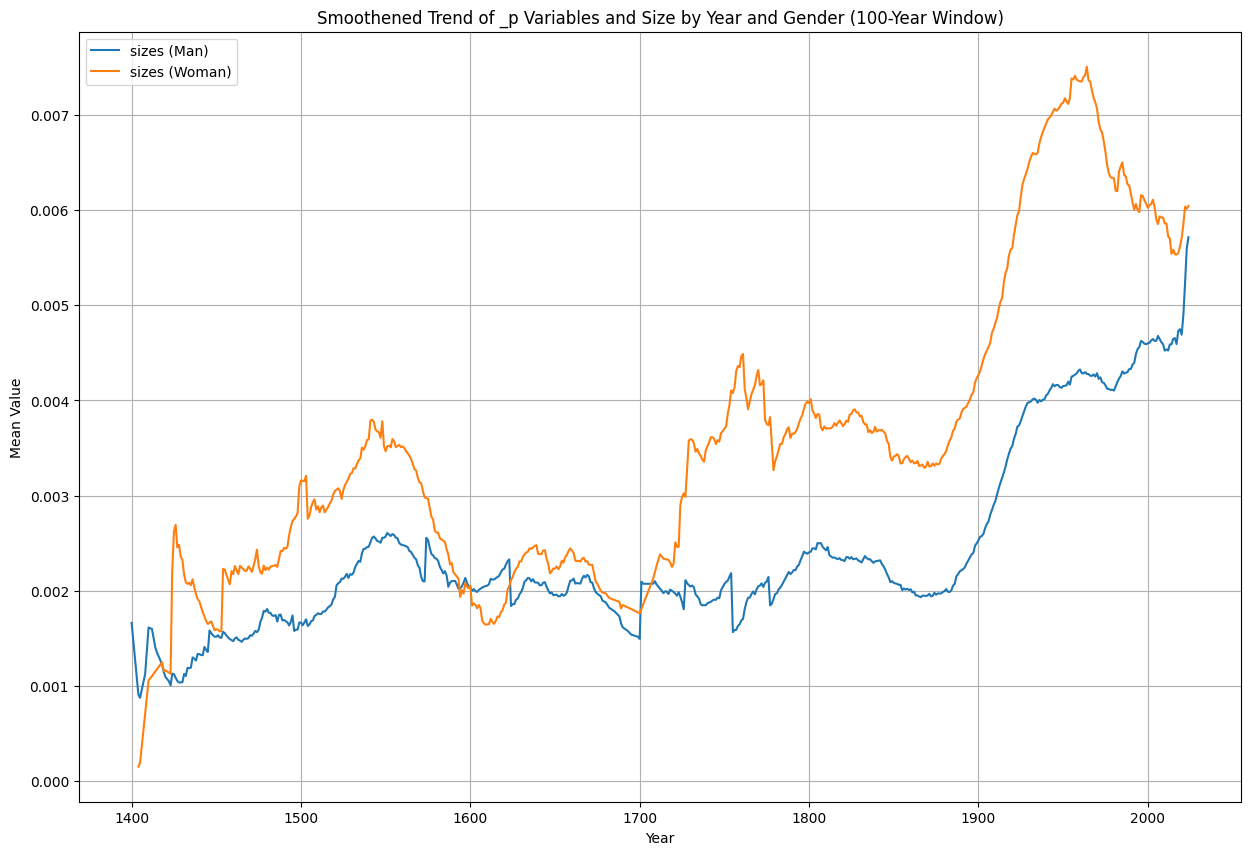

In [ ]:
# prompt: visualize the _p variables and size trend by years and gender, smoothened it in 100 year

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'merged_df' is already created as in your provided code.
# ... (your existing code to create merged_df) ...

# Function to smooth the data using a moving average
def smooth_data(data, window_size):
    return np.convolve(data, np.ones(window_size), 'valid') / window_size


# Group by year and gender, then calculate the mean of relevant columns
grouped_data = merged_df.groupby(['year', 'gender'])[['v_p', 'h_p', 'l_p', 'sizes']].mean().reset_index()

# Smoothen the data using a rolling window
window_size = 50  # Adjust the window size as needed
smoothed_data = grouped_data.groupby('gender').rolling(window=window_size, on='year', min_periods=1).mean()

# Plotting the smoothened trends
plt.figure(figsize=(15, 10))

for gender in smoothed_data.index.levels[0]:
    plt.plot(smoothed_data.loc[gender, 'year'], smoothed_data.loc[gender, 'v_p'], label=f'v_p ({gender})')
    plt.plot(smoothed_data.loc[gender, 'year'], smoothed_data.loc[gender, 'h_p'], label=f'h_p ({gender})')
    plt.plot(smoothed_data.loc[gender, 'year'], smoothed_data.loc[gender, 'l_p'], label=f'l_p ({gender})')


plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Smoothened Trend of _p Variables and Size by Year and Gender (100-Year Window)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 10))

for gender in smoothed_data.index.levels[0]:
    plt.plot(smoothed_data.loc[gender, 'year'], smoothed_data.loc[gender, 'sizes'], label=f'sizes ({gender})')

plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Smoothened Trend of _p Variables and Size by Year and Gender (100-Year Window)')
plt.legend()
plt.grid(True)
plt.show()


# Alternative gender detection

In [ ]:

# Create an empty dictionary to store the labeled face data.
labeled_faces = {}

# Iterate through the loaded results.
for artwork_id, face_results in loaded_results.items():
    labeled_faces[artwork_id] = []  # Initialize an empty list for each artwork.
    for i, face_data in enumerate(face_results):
        # Create a new dictionary for each face with an identification label.
        labeled_face = {
            "id": f"{artwork_id}_face_{i+1}",  # Create unique IDs for faces within each artwork
            "gender": face_data.get('gender', 'Unknown'),
            "head_pose": face_data.get('head_pose', [0,0,0]),
            "size": face_data.get('size', 0),
            'bbox': face_data.get('bbox', []),
            'landmarks': face_data.get('landmarks', {})
        }
        labeled_faces[artwork_id].append(labeled_face)

# Now 'labeled_faces' contains the data with identification labels for each face.
# Example: Accessing the ID of the first face in artwork '123':
print(labeled_faces[123][0]['id'])


123_face_1


In [ ]:
import os
import numpy as np
from PIL import Image
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader, Subset
import torchvision.models as models
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report

# -----------------------------
# Define the FaceDataset with gender label extraction.
# -----------------------------
class FaceDataset(Dataset):
    """
    A PyTorch Dataset for extracting face crops from artwork images using bounding box (bbox)
    information and converting detection gender probabilities into labels.

    Label: 0 for "Woman", 1 for "Man" (based on which probability is higher).
    """
    def __init__(self, artwork_dataset, face_info, transform=None):
        self.artwork_dataset = artwork_dataset
        self.face_info = face_info
        self.transform = transform

        # Build a list of (artwork_id, image, detection) entries.
        self.data_list = []
        for idx in tqdm(range(len(artwork_dataset))):
            _, image, artwork_id = artwork_dataset[idx]
            if artwork_id in face_info:
                for detection in face_info[artwork_id]:
                    self.data_list.append((artwork_id, image, detection))

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        artwork_id, image, detection = self.data_list[idx]

        # Convert the gender probabilities to a label.
        # Here, we decide:
        #   If 'Woman' score is higher by a threshold, label = 0,
        #   If 'Man' score is higher by a threshold, label = 1,
        #   Otherwise, label = 2 (ambiguous).
        gender_prob = detection.get("gender", {})
        woman_prob = gender_prob.get("Woman", 0)
        man_prob = gender_prob.get("Man", 0)
        # Adjust threshold (here, 0.99 difference) as needed.
        if woman_prob - man_prob > 0.99:
            label = 0
        elif man_prob - woman_prob > 0.99:
            label = 1
        else:
            label = 2

        bbox = detection["bbox"]  # Expected format: [x_min, y_min, x_max, y_max]

        # Crop the face using the bbox.
        face_crop = image.crop(tuple(bbox))

        if self.transform:
            face_crop = self.transform(face_crop)
        else:
            # Convert to tensor if no additional transform provided.
            face_crop = transforms.ToTensor()(face_crop)


        return {
            "face": face_crop,
            "label": torch.tensor(label, dtype=torch.long),
            "face_id": detection.get("id", {})
        }

# -----------------------------
# Data transforms for face images.
# -----------------------------
face_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet typically expects 224x224 images.
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Create the FaceDataset with the transform.
face_dataset = FaceDataset(artist_dataset, labeled_faces, transform=face_transform)


100%|██████████| 151776/151776 [13:19<00:00, 189.95it/s]


In [ ]:
# -----------------------------
# Filter to use only faces coded as 0 and 1.
# -----------------------------
filtered_indices = [i for i in tqdm(range(len(face_dataset))) if face_dataset[i]["label"].item() in [0, 1]]

# -----------------------------
# Split indices into train, validation, and test sets (e.g., 70%/15%/15%)
# -----------------------------
train_idx, temp_idx = train_test_split(filtered_indices, test_size=0.3, random_state=42)
val_idx, test_idx = train_test_split(temp_idx, test_size=0.5, random_state=42)

# Create Subset datasets.
train_dataset = Subset(face_dataset, train_idx)
val_dataset = Subset(face_dataset, val_idx)
test_dataset = Subset(face_dataset, test_idx)

# Create DataLoaders.
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# -----------------------------
# Setting up the model for transfer learning:
# -----------------------------

# Device selection.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)
model = model.to(device)

# Define the loss function and optimizer.
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)




100%|██████████| 159962/159962 [03:40<00:00, 725.68it/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 175MB/s]


In [ ]:
device

device(type='cuda')

In [ ]:
# -----------------------------
# Training loop with early stopping based on validation loss (optional).
# -----------------------------
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase.
    for batch in train_loader:
        faces = batch["face"].to(device)  # Shape: (batch_size, 3, H, W)
        labels = batch["label"].to(device)

        optimizer.zero_grad()

        outputs = model(faces)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * faces.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / total
    train_acc = correct / total * 100

    # Validation phase.
    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for batch in val_loader:
            faces = batch["face"].to(device)
            labels = batch["label"].to(device)

            outputs = model(faces)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * faces.size(0)
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss = val_running_loss / val_total
    val_acc = val_correct / val_total * 100

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f} Train Acc: {train_acc:.2f}% "
          f"Val Loss: {val_loss:.4f} Val Acc: {val_acc:.2f}%")


In [ ]:
# -----------------------------
# Evaluation on Test Data: Compute Classification Metrics.
# -----------------------------
model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for batch in test_loader:
        faces = batch["face"].to(device)
        labels = batch["label"].to(device)
        outputs = model(faces)
        _, predicted = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

# Compute accuracy.
acc = accuracy_score(all_labels, all_preds)
print("Test Accuracy: {:.2f}%".format(acc * 100))

# Compute precision, recall, and F1-score.
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='binary', pos_label=1)
print("Precision: {:.2f}, Recall: {:.2f}, F1-score: {:.2f}".format(precision, recall, f1))


In [ ]:

# Create a DataLoader for the entire dataset.
full_dataset_loader = DataLoader(face_dataset, batch_size=32, shuffle=False, num_workers=4)

# Make predictions for the entire dataset.
model.eval()
all_predictions = []
all_face_ids = []

with torch.no_grad():
    for batch in tqdm(full_dataset_loader):  # Use tqdm for a progress bar
        faces = batch["face"].to(device)
        outputs = model(faces)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())
        all_face_ids.extend(batch["face_id"])

# Store predictions with corresponding artwork_ids and face_ids
loaded_results_with_predictions = {}

prediction_index = 0
for artwork_id, face_results in loaded_results.items():
    loaded_results_with_predictions[artwork_id] = []
    for face_data in face_results:
      face_data["predicted_gender"] = all_predictions[prediction_index] # Add the predicted gender
      loaded_results_with_predictions[artwork_id].append(face_data)
      prediction_index += 1

# Save the results
joblib.dump(loaded_results_with_predictions, '/content/drive/MyDrive/artist_data/face_results_with_predictions.joblib')
